<a href="https://colab.research.google.com/github/deivid-01/Snakes-Classifier/blob/main/03_data_exploration_pre_processed_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration  - Pre-processed dataset

### About:

- This notebook is focus on explore pre-proccesed dataset  from [Snake Breeds](https://www.kaggle.com/deividt/snake-breeds) in order to check if data was correctly pre-processed and it's ready for train the model.
---
David Andrés Torres Betancour <br/>
Computer Engineering  Student <br/>
University of Antioquia <br/>
davida.torres@udea.edu.co

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
import h5py
import random
import json
%matplotlib inline

## Tools

### Kaggle Tools

In [ ]:
def loadCredentials():
  '''
  Description:
    Loads and configure kaggle.json file with credentials.

  Parameters:
      No parameters.

  Returns:
      No return.   
  ''' 
  print(bcolors.BOLD + "Upload kaggle.json file with credentials\n" + bcolors.ENDC)
  print(bcolors.WARNING + "IMPORTANT: Filename must be: kaggle.json\n" + bcolors.ENDC)
  uploaded_file=files.upload() #Upload file
  assert len(uploaded_file)>0,"Fetch canceled: Dataset not loaded"
  assert list(uploaded_file.keys())[0]=='kaggle.json', "Filename must be: kaggle.json"
 


  os.environ['KAGGLE_CONFIG_DIR'] = '/content' #Setup folder
  ! chmod 600 /content/kaggle.json  #Hide kaggle.json


def fetchDatasetFromKaggle(dataset_name, force_fetch=False):
  '''
  Description:
    fetchs dataset  from kaggle.

  Parameters:
      No parameters.

  Returns:
      No return.   
  '''
  if os.path.exists('kaggle.json') == False: 
    loadCredentials() 

  if force_fetch==True:
   process_info=! kaggle datasets download -d deividt/{dataset_name} --force #Download dataset
   if "100%" in list(process_info)[-1]:
       print(bcolors.OKGREEN + "Data from kaggle successfully fetch\n" + bcolors.ENDC)
       print(bcolors.BOLD + "Unzipping data..." + bcolors.ENDC)
       ! unzip \*.zip && rm *.zip
       print(bcolors.OKGREEN + "Data is ready in your local folder!\n" + bcolors.ENDC)
   elif "404 - Not Found" in list(process_info)[0]: 
       print(bcolors.FAIL + "404 - Dataset  Not Found in 'deividt' Account\n" + bcolors.ENDC)
   else:
       assert False,list(process_info)[-1]


  else:
   process_info =  ! kaggle datasets download -d deividt/{dataset_name} 
   if "Skipping" in list(process_info)[0]:
       print(bcolors.WARNING + "Data already exists locally\nIf you want force fetch set force_fetch parameter to True" + bcolors.ENDC)
  
   elif "100%" in list(process_info)[-1]:
       print(bcolors.OKGREEN + "Data from kaggle successfully fetch\n" + bcolors.ENDC)
       print(bcolors.BOLD + "Unzipping data... s\n" + bcolors.ENDC)
       ! unzip \*.zip && rm *.zip #Unzip downloaded file and delete zip
       print(bcolors.OKGREEN + "Data is ready in your local folder!\n" + bcolors.ENDC)
   elif "404 - Not Found" in list(process_info)[0]: 
       print(bcolors.FAIL + "404 - Dataset  Not Found in 'deividt' Account\n" + bcolors.ENDC)
   else:
       assert 1==2,list(process_info)[-1]

### Exploration Tools

In [24]:
class bcolors:
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'

def missingValues(dataF):
  '''
  Description:
    Returns the reversed String.

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  '''
  k = dataF.isna().sum()
  miss_values = k[k!=0]
  if miss_values.size>0:
    return (miss_values)
  return ("No missing values")



def decode_breedID(idx):
  '''
  Description:
    Returns the reversed String.

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  '''
  df_decode = pd.read_csv('decode_breed.csv')
  breed_encode = df_decode['breed_encode']
  return df_decode.loc[breed_encode == idx]['breed'].tolist()[0]

def getRandomGroup(max_groups=1):
  '''
  Description:
    Returns the reversed String.

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  '''
  group_num =str(random.randint(1,max_groups))
  destination_filepath ='group_'+group_num+'.h5'
  with h5py.File(destination_filepath, "r") as f:
      
      print(bcolors.BOLD + f"Reading group {group_num}..." + bcolors.ENDC)

      x = f["input_data"][:]
      x = x.reshape(x.shape[0],224,224,3)

      y = f["input_labels"][:]

      print(bcolors.OKGREEN + "Data readed\n" + bcolors.ENDC)


      print("Keys: ",list(f.keys()))
      print('x shape =', x.shape, '| y shape =', y.shape)
      
      
      
      return x,y,group_num
#Printing ------------------------------------------------------------------------
def showGroupDetailedInfo(group_num,y):
  '''
  Description:
    Returns the reversed String.

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  ''' 

  unique_values = np.unique(y)

  snake_names=[]
  snake_count=[]
  for value in unique_values:
    snake_name=decode_breedID(value)
    snake_names.append( value )
    snake_count.append(len(y[y==value]))
   
   #Plotting bar chart
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(snake_names,snake_count)
  ax.set_ylabel('Count')
  ax.set_xlabel('Breed code')
  ax.set_title('Group '+group_num+' Breeds count')
  plt.show()


def showRandomImage(x,y): 
  '''
  Description:
    Returns the reversed String.

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  '''
  index = random.randint(0,x.shape[0])
  image = x[index]
  plt.imshow(image)
  print("Img shape:",image.shape)
  print('breed:', decode_breedID(y[index]))


def show_labeled_image_mosaic(imgs, labels, figsize=(20, 20), idxs=None):
  '''
  Description:
    Returns the reversed String.

    Author: Raul Ramos Pollan

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  '''

  plt.figure(figsize=figsize)
  for labi,lab in [i for i in enumerate(np.unique(labels))]:
      k = imgs[labels == lab]
      _idxs = idxs[:5] if idxs is not None else np.random.permutation(len(k))[:5]
      for i, idx in enumerate(_idxs):
          if i == 0:
              plt.subplot(10, 11, labi*11+1)
              plt.title("LABEL %d" % lab)
              plt.plot(0, 0)
              plt.axis("off")

          img = k[idx]
          plt.subplot(10, 11, labi*11+i+2)
          plt.imshow(img, cmap=plt.cm.Greys_r)
          plt.axis("off")

## Loading data

- Downloading pre-proccessed dataset [snake-breeds](https://www.kaggle.com/deividt/snake-breeds) from Kaggle.

<font color='red'>Fetching data and unzipping files can take several minutes ( at least 30 min)  </font> 

In [6]:
fetchDatasetFromKaggle( dataset_name = "snake-breeds")

Upload kaggle.json file with credentials

IMPORTANT: Filename must be: kaggle.json



Saving kaggle.json to kaggle.json
Data from kaggle successfully fetch

Unzipping data...
Archive:  snake-breeds.zip
  inflating: data.csv                
  inflating: decode_breed.csv        
  inflating: group_1.h5              
  inflating: group_10.h5             
  inflating: group_2.h5              
  inflating: group_3.h5              
  inflating: group_4.h5              
  inflating: group_5.h5              
  inflating: group_6.h5              
  inflating: group_7.h5              
  inflating: group_8.h5              
  inflating: group_9.h5              
  inflating: originaldata.csv        
Data is ready in your local folder!



- Reading main .csv file

In [9]:
df = pd.read_csv('data.csv')

##Data exploration

- First  samples

In [14]:
df.head(5)

,id,image_id,breed,breed_encode
0,0,3f8b32599b6c439c928b8ece2b89aa93,thamnophis-sirtalis,9.0
1,1,ae317697c17a4f169201e6d7d268b497,thamnophis-sirtalis,9.0
2,2,6630beeadea5494887b6d324fdb452a9,thamnophis-sirtalis,9.0
3,3,4a53a37f861945bd8a1bcc194825c456,thamnophis-sirtalis,9.0
4,4,7552916f07e94c358458bbedefe9143b,thamnophis-sirtalis,9.0


- Last samples

In [15]:
df.tail(5)

,id,image_id,breed,breed_encode
79995,73995,cb7977ade7734668a2a17d4a35fcda58,nerodia-erythrogaster,3.0
79996,73996,75e429bec05a413984fd6aa0eff6980e,nerodia-erythrogaster,3.0
79997,73997,095873af5c5047449a6e939d42a2a496,nerodia-erythrogaster,3.0
79998,73998,97db701611,nerodia-erythrogaster,3.0
79999,73999,bf28c8247b8f420ba24ceaa9fed44701,nerodia-erythrogaster,3.0


- Missing values in columns

In [16]:
missingValues(df)

'No missing values'

- Data types

In [17]:
for c in df.columns:
    print ("%20s"%c, df[c].dtype)

                  id int64
            image_id object
               breed object
        breed_encode float64


- Data Size

In [18]:
df.shape

(80000, 4)

- Breeds:

In [19]:
print(pd.unique(df['breed']));

['thamnophis-sirtalis' 'storeria-dekayi' 'pantherophis-obsoletus'
 'crotalus-atrox' 'nerodia-sipedon' 'pituophis-catenifer'
 'pantherophis-alleghaniensis' 'agkistrodon-contortrix'
 'diadophis-punctatus' 'nerodia-erythrogaster']


- Total breeds:

In [20]:
len ( pd.unique(df['breed']))

10

- Total images for each breed : 

In [21]:
df['breed'].value_counts()

diadophis-punctatus            8000
thamnophis-sirtalis            8000
agkistrodon-contortrix         8000
nerodia-erythrogaster          8000
pituophis-catenifer            8000
pantherophis-alleghaniensis    8000
nerodia-sipedon                8000
storeria-dekayi                8000
pantherophis-obsoletus         8000
crotalus-atrox                 8000
Name: breed, dtype: int64

- Data density:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


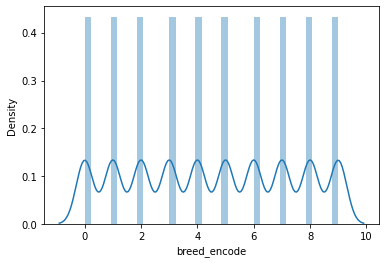

In [22]:
sns.distplot(df['breed_encode']);

###Visualizating images from .h5 Files

- Reading random group (.h5 file):

In [25]:
total_breeds = len ( pd.unique(df['breed']))
x,y,groupNum =getRandomGroup( max_groups= total_breeds )

Reading group 6...
Data readed

Keys:  ['input_data', 'input_labels']
x shape = (2000, 224, 224, 3) | y shape = (2000,)


- Breeds count

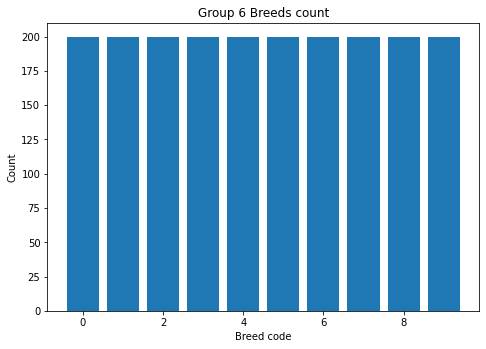

In [26]:
showGroupDetailedInfo(groupNum,y)

- Random images from each breed:

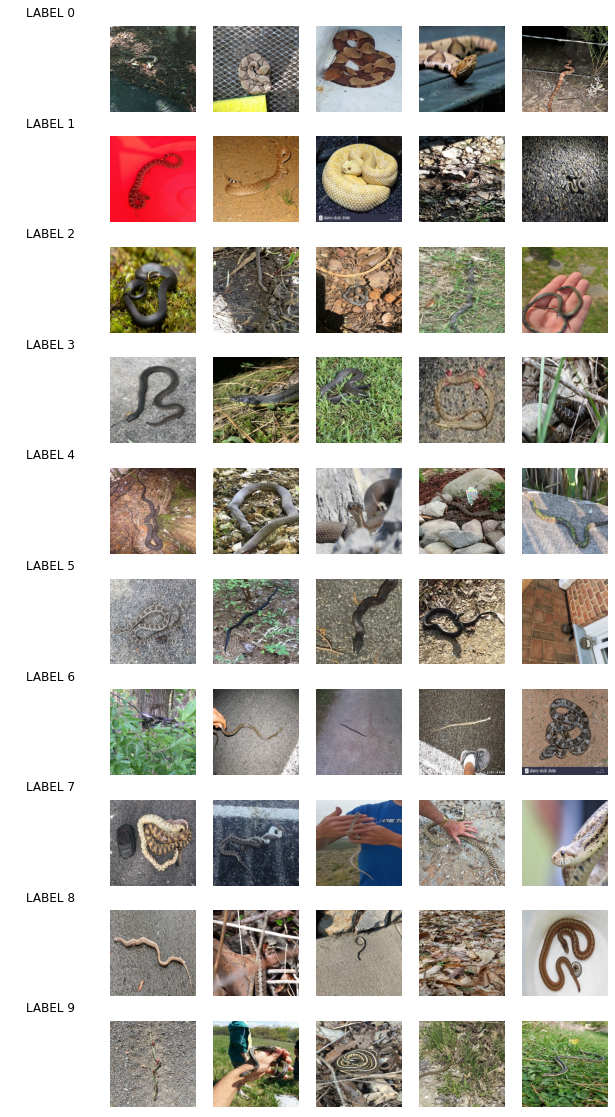

In [27]:
 show_labeled_image_mosaic(x,y)